IMPORT NECESSARY LIBRARIES

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

LOAD DATA

In [2]:
df = pd.read_csv('./datasets/datasets.csv')

PREPROCESS DATA

In [3]:
df

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Preprocessing data
df.rename(columns={'6':'Pregnancies','148':'Glucose','72':'BloodPressure','35':'SkinThickness','0':'Insulin','33.6':'BMI','0.627':'DiabetesPedigreeFunction','50':'Age','1':'Outcome'
},inplace=True)

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['Outcome'].value_counts()

Outcome
0    500
1    267
Name: count, dtype: int64

VISUALIZE DATA

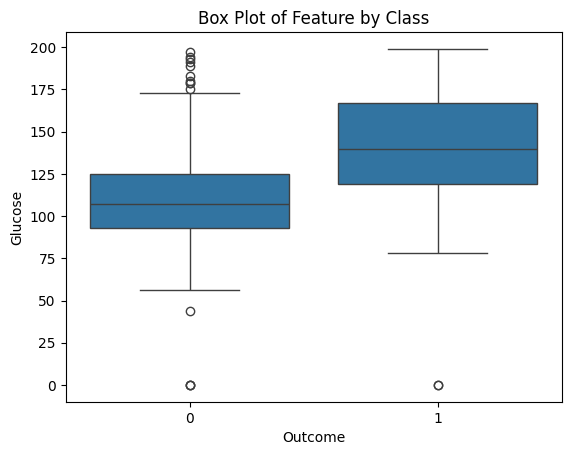

In [8]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Your dataframe 'df' should be defined before this point

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Your seaborn code
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Box Plot of Feature by Class')
plt.show()

# We can see that high glucose means higher chances of diabetes

c:\Users\abhik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


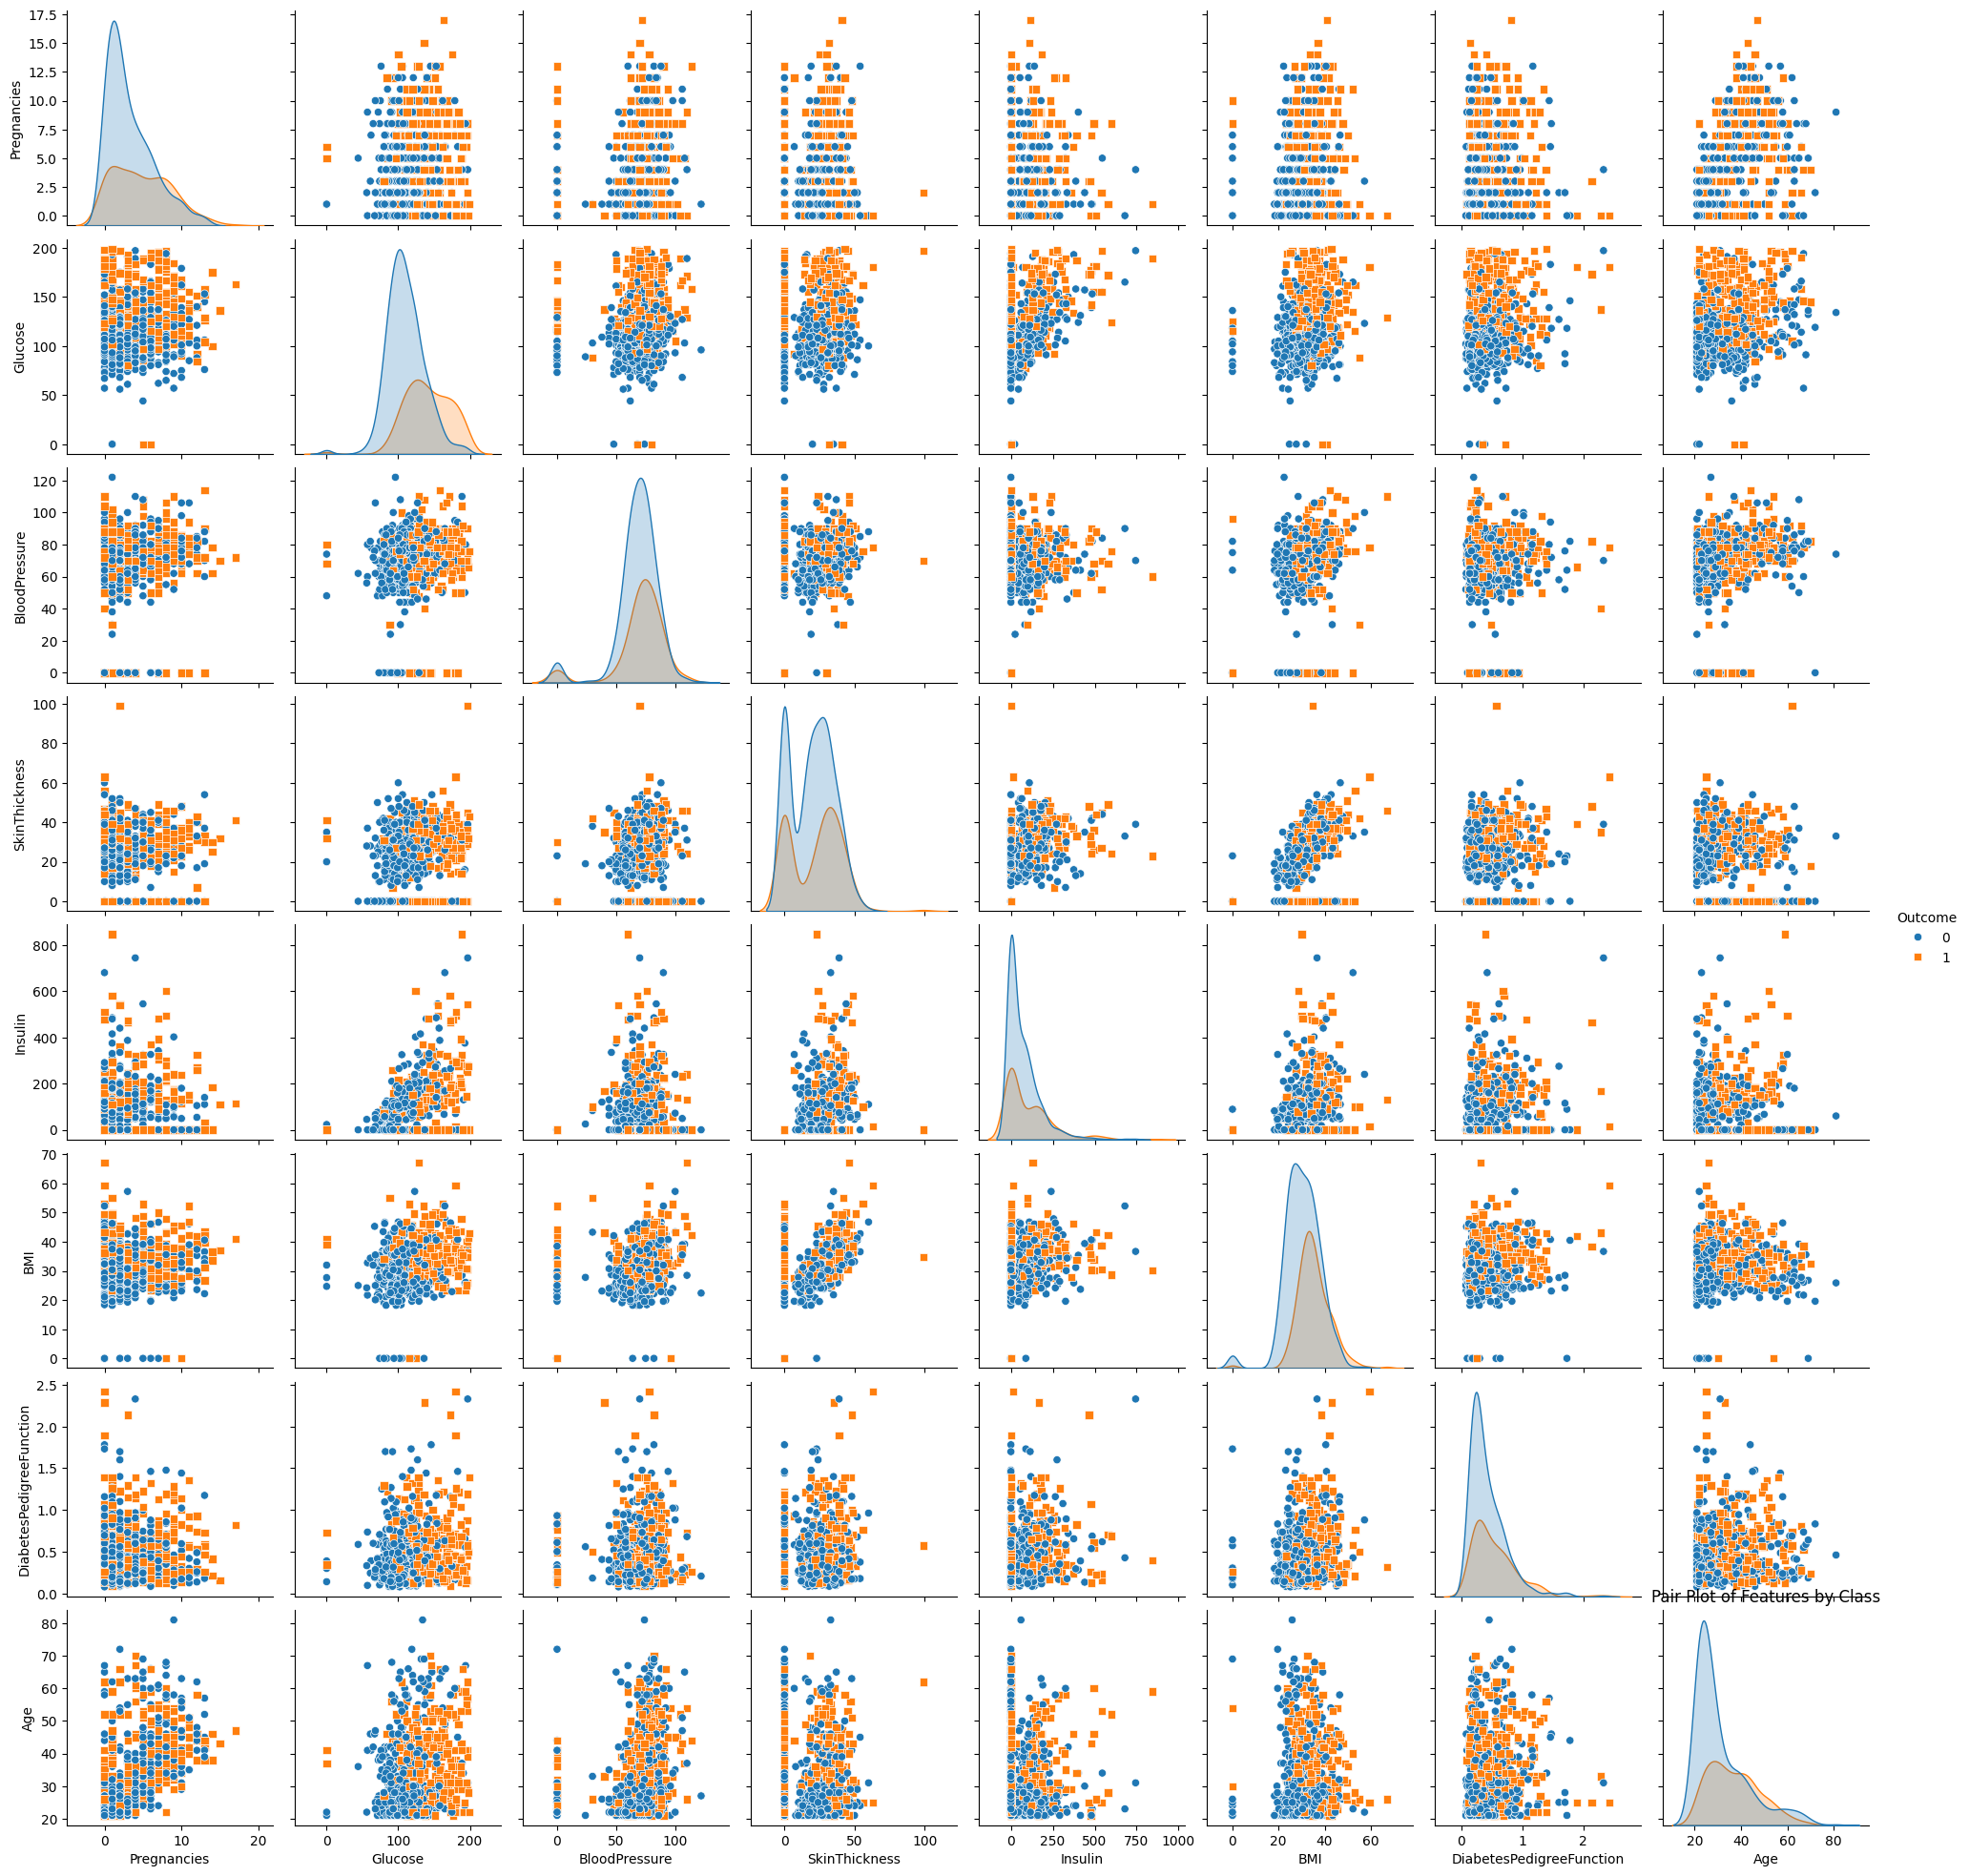

In [9]:
import seaborn as sns
# pair plot
sns.pairplot(df, hue='Outcome', markers=["o", "s"])
plt.title('Pair Plot of Features by Class')
plt.show()

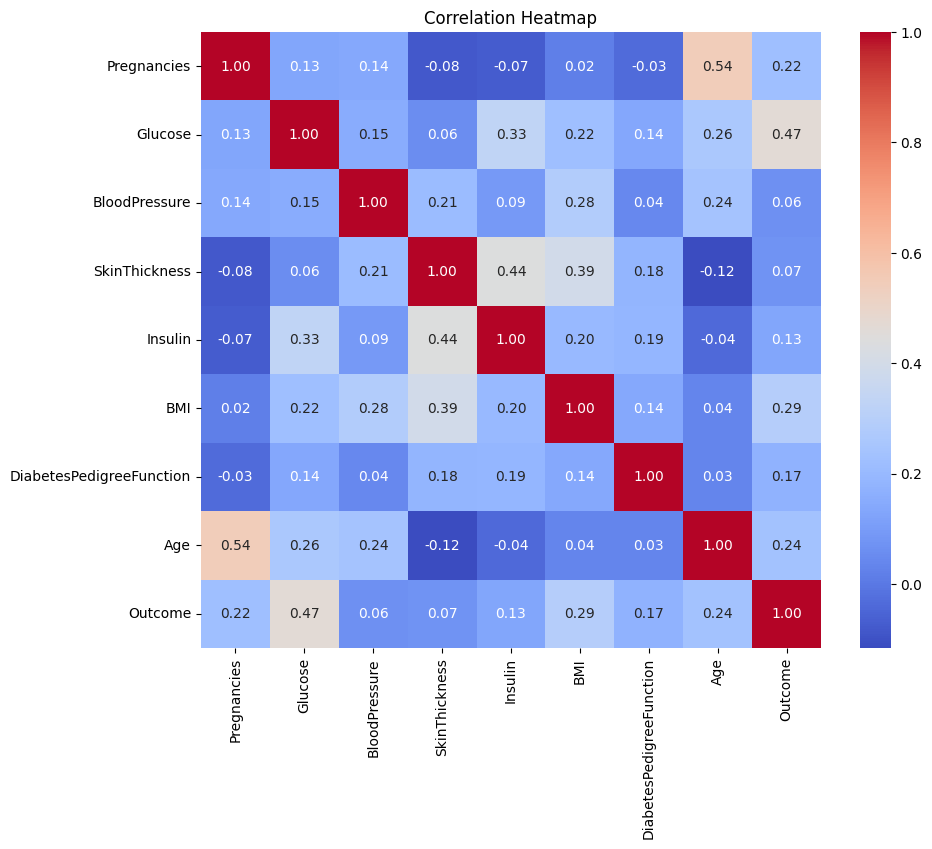

In [10]:
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


FEATURE SELECTION

In [11]:
# Split data into features (X) and target (y)
X = df.drop('Outcome', axis='columns')  # 'Outcome' is the target variable
y = df['Outcome']

In [12]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63
763,2,122,70,27,0,36.8,0.340,27
764,5,121,72,23,112,26.2,0.245,30
765,1,126,60,0,0,30.1,0.349,47


In [13]:
y

0      0
1      1
2      0
3      1
4      0
      ..
762    0
763    0
764    0
765    1
766    0
Name: Outcome, Length: 767, dtype: int64

SPLIT THE DATA INTO TRAINING PART AND TESTING PART

In [14]:
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=20)

SCALE THE DATA

In [15]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

DEFINE AND COMPILE MODEL

In [16]:
# Define the deep learning model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Define a function to create a Keras model
# def create_model(learning_rate=0.001, neurons=64):
#     model = keras.Sequential([
#         layers.Input(shape=(X_train.shape[1],)),
#         layers.Dense(neurons, activation='relu'),
#         layers.Dense(1, activation='sigmoid')
#     ])
#     optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
#     model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# # Create a custom Keras classifier for scikit-learn compatibility
# class KerasClassifier(BaseEstimator, ClassifierMixin):
#     def __init__(self, learning_rate=0.001, neurons=64, epochs=10, batch_size=32, verbose=0):
#         self.learning_rate = learning_rate
#         self.neurons = neurons
#         self.epochs = epochs
#         self.batch_size = batch_size
#         self.verbose = verbose
#         self.model = None

#     def build_model(self):
#         self.model = create_model(self.learning_rate, self.neurons)

#     def fit(self, X, y):
#         self.build_model()
#         self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
#         return self

#     def predict(self, X):
#         return (self.model.predict(X) > 0.5).astype('int32')

# # Define the hyperparameters to tune
# param_grid = {
#     'learning_rate': [0.001, 0.01, 0.1],
#     'neurons': [32, 64, 128],
#     'epochs' : [5, 6, 18],
#     'batch_size' : [20, 27, 34],
# }

# # Create a GridSearchCV object
# model = KerasClassifier(epochs=10, batch_size=32)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=StratifiedKFold(n_splits=3), scoring='accuracy')

# # Perform the grid search
# grid_search_result = grid_search.fit(X_train, y_train)

# # Get the best hyperparameters from the grid search
# best_learning_rate = grid_search_result.best_params_['learning_rate']
# best_neurons = grid_search_result.best_params_['neurons']
# best_epochs = grid_search_result.best_params_['epochs']
# best_batch_size = grid_search_result.best_params_['batch_size']


# # Create a model with the best hyperparameters
# best_model = create_model(learning_rate=best_learning_rate, neurons=best_neurons)

# # Train the best model on the full training data
# best_model.fit(X_train, y_train, epochs=best_epochs, batch_size=best_batch_size)

# # Evaluate the best model on the test data
# y_pred = (best_model.predict(X_test) > 0.5).astype('int32')
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Test accuracy with the best hyperparameters: {accuracy * 100:.2f}%')


TRAIN THE MODEL

In [17]:
# Training the model
model.fit(X_train, y_train, epochs=6, batch_size=27, validation_split=0.2)

Epoch 1/6
19/19 [==============================] - 2s 20ms/step - loss: 0.6488 - accuracy: 0.6449 - val_loss: 0.5772 - val_accuracy: 0.7480
Epoch 2/6
19/19 [==============================] - 0s 4ms/step - loss: 0.5687 - accuracy: 0.7306 - val_loss: 0.5270 - val_accuracy: 0.7642
Epoch 3/6
19/19 [==============================] - 0s 4ms/step - loss: 0.5244 - accuracy: 0.7469 - val_loss: 0.4940 - val_accuracy: 0.7642
Epoch 4/6
19/19 [==============================] - 0s 4ms/step - loss: 0.4963 - accuracy: 0.7592 - val_loss: 0.4743 - val_accuracy: 0.7805
Epoch 5/6
19/19 [==============================] - 0s 3ms/step - loss: 0.4811 - accuracy: 0.7571 - val_loss: 0.4692 - val_accuracy: 0.7967
Epoch 6/6
19/19 [==============================] - 0s 3ms/step - loss: 0.4726 - accuracy: 0.7633 - val_loss: 0.4665 - val_accuracy: 0.7886


EVALUATE THE MODEL

In [18]:
# Evaluating the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

5/5 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.8312
Test accuracy: 83.12%


PREDICTION

In [19]:
from collections import Counter

# Input data for prediction
user_input_data = []

# Prompt the user to enter values for each feature
# for feature_name in X.columns:
#     value = float(input(f"Enter the value for {feature_name}: "))
#     user_input_data.append(value)

user_input_data = [6,148,72,35,0,33.6,0.627,50] # sample input data

# Standardize the user input data using the same scaler
input_data = scaler.transform([user_input_data])
prediction = model.predict(input_data);

if prediction < 0.5:
    print("Non-Diabetic person")
else:
    print("Diabetic Person")

1/1 [==============================] - 0s 115ms/step
Diabetic Person


c:\Users\abhik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
